In [1]:
import pandas as pd
import numpy as np


In [2]:
def cr_col_name(pre,start,end):
    return [pre + str(i) for i in range (start,end+1)]

id_cols=['TransactionID','TransactionDT','DeviceInfo','P_emaildomain','R_emaildomain']
cat_cols=(['ProductCD'] + ['card3','card4','card6'] + cr_col_name('M',1,9) + ['DeviceType'] + cr_col_name('id_',12,16)+['id_23','id_27'] + cr_col_name('id_',28,38))
target='isFraud'
# dummies = train_transaction[id_cols]
# print(cat_cols)

# for i in cat_cols :
#     X1=pd.get_dummies(train[i])
#     dummies=dummies.join(X1)
#     print(dummies.head())

# + ['P_emaildomain','R_emaildomain'] 

In [3]:
train_identity=pd.read_csv('/Users/harshkothari/Downloads/ieee-fraud-detection/train_identity.csv')
train_transaction=pd.read_csv('/Users/harshkothari/Downloads/ieee-fraud-detection/train_transaction.csv')
train=pd.merge(train_transaction,train_identity,on='TransactionID',how='left')


In [4]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
dummies = train[id_cols]

for i in cat_cols :
    X1=pd.get_dummies(train[i],prefix=i)
    dummies=dummies.join(X1)


In [6]:
dummies = dummies.drop("TransactionID", axis=1)
dummies = dummies.drop("TransactionDT", axis=1)
dummies = dummies.drop("DeviceInfo", axis=1)
dummies = dummies.drop("P_emaildomain", axis=1)
dummies = dummies.drop("R_emaildomain", axis=1)

dummies.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card3_100.0,card3_101.0,card3_102.0,card3_105.0,card3_106.0,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1


In [7]:
numeric_cols=[col for col in train.columns if col not in cat_cols + id_cols + [target] ]
X=train[numeric_cols]
print(X.head)
X=X.join(dummies)
y=train[target]



<bound method NDFrame.head of         TransactionAmt  card1  card2  card5  addr1  addr2   dist1   dist2  \
0               68.500  13926    NaN  142.0  315.0   87.0    19.0     NaN   
1               29.000   2755  404.0  102.0  325.0   87.0     NaN     NaN   
2               59.000   4663  490.0  166.0  330.0   87.0   287.0     NaN   
3               50.000  18132  567.0  117.0  476.0   87.0     NaN     NaN   
4               50.000   4497  514.0  102.0  420.0   87.0     NaN     NaN   
5               49.000   5937  555.0  226.0  272.0   87.0    36.0     NaN   
6              159.000  12308  360.0  166.0  126.0   87.0     0.0     NaN   
7              422.500  12695  490.0  226.0  325.0   87.0     NaN     NaN   
8               15.000   2803  100.0  226.0  337.0   87.0     NaN     NaN   
9              117.000  17399  111.0  224.0  204.0   87.0    19.0     NaN   
10              75.887  16496  352.0  134.0    NaN    NaN     NaN     NaN   
11              16.495   4461  375.0  224.0   

In [8]:
all_col=X.columns
X.loc[:,all_col]=X[all_col].fillna(0.0)

In [9]:
X.columns

Index(['TransactionAmt', 'card1', 'card2', 'card5', 'addr1', 'addr2', 'dist1',
       'dist2', 'C1', 'C2',
       ...
       'id_34_match_status:1', 'id_34_match_status:2', 'id_35_F', 'id_35_T',
       'id_36_F', 'id_36_T', 'id_37_F', 'id_37_T', 'id_38_F', 'id_38_T'],
      dtype='object', length=1120)

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [11]:
X_train.shape

(354324, 1120)

In [12]:
X_test.shape

(236216, 1120)

In [14]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

k = 3
my_knn= KNeighborsClassifier(n_neighbors=k) 
my_knn.fit(X_train,y_train)
y_predict = my_knn.predict(X_test)




In [15]:
y_predict = my_knn.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(y_test, y_predict)


In [17]:
print(accuracy2)

0.9654426457140922


In [19]:
y_test_array=np.array(y_test)
for i in range(len(y_predict)) :
    if y_predict[i] != y_test_array[i] :
        print('Pridict',y_predict[i])
        print('true',y_test_array[i])
        print('break')


Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 1
true 0
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 1
true 0
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 1
true 0
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 1
true 0
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 0
true 1
break
Pridict 1
true 0
break
Pridict 0
t

In [21]:
for i in range(len(y_predict)) :
    if y_predict[i] == 1 :
        print(i)

61
556
580
786
811
843
859
1188
1299
1382
1454
1644
1721
1921
2055
2296
2479
2658
2678
2872
3144
3702
3759
3943
4025
4045
4068
4203
4692
4694
4856
5024
5055
5069
5091
5189
5232
5301
5463
5806
5863
5953
5955
6061
6084
6275
6331
6364
6400
6442
6486
6542
6720
6740
6863
6964
7034
7046
7086
7090
7128
7143
7206
7585
7611
7676
7750
7818
7855
7900
7957
8151
8161
8197
8251
8476
8603
8644
8813
8986
9118
9251
9481
9488
9496
9687
9987
9999
10057
10263
10279
10378
10386
10555
10597
10802
10807
10864
10937
11238
11274
11302
11545
11587
11734
11748
11923
11958
11962
11971
12137
12397
12497
12554
12714
12748
12904
12909
12919
12934
12937
12988
13077
13081
13158
13214
13251
13291
13305
13369
13372
13656
13762
13849
13875
13882
13991
13992
14075
14210
14250
14252
14283
14433
14488
14667
14703
14802
14824
14842
14870
14920
15045
15057
15196
15352
15415
15484
15591
15826
15970
16004
16043
16053
16072
16076
16125
16126
16172
16179
16421
16654
16676
16689
16692
16725
16877
16897
17014
17031
17110
17144
1740

In [26]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
# y_predict2 = my_decisiontree.predict(X_test)
# #print(y_predict , y_test)
# accuracy2 = accuracy_score(y_test, y_predict2)
# print(accuracy2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [27]:
y_predict2 = my_decisiontree.predict(X_test)


In [28]:
accuracy3 = accuracy_score(y_test, y_predict2)
print(accuracy3)

0.9655188471568396


In [22]:
#Accuracy using Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)


/Users/harshkothari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harshkothari/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predict_lr = my_logreg.predict(X_test)
score_lr = accuracy_score(y_test, y_predict_lr)
print(score_lr)

0.965806719273885


In [24]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print(AUC)

0.755217346850522


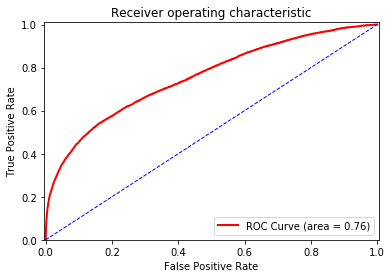

In [25]:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [ ]:
# #Accuracy using KNN (with k=3) (10 fold cross validation)
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.model_selection import cross_val_score
# k = 3
# knn = KNeighborsClassifier(n_neighbors=k)
# accuracy_list1 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
# print(accuracy_list1)
# accuracy_cv1 = accuracy_list1.mean()
# print(accuracy_cv1)

In [ ]:
# #Accuracy using Decision Tree (with random_state=5) (10 fold cross validation)
# from sklearn.tree import DecisionTreeClassifier

# my_decisiontree = DecisionTreeClassifier(random_state=5)
# accuracy_list2 = cross_val_score(my_decisiontree, X3, y, cv=10, scoring='accuracy')
# print(accuracy_list2)
# accuracy_cv2 = accuracy_list2.mean()
# print(accuracy_cv2)

In [ ]:
# #Accuracy using Logistic Regression Classifiers (10 fold cross validation)
# Accuracy using Logistic Regression Classifiers

# my_logreg = LogisticRegression()
# accuracy_list3 = cross_val_score(my_logreg, X3, y, cv=10, scoring='accuracy')
# print(accuracy_list3)
# accuracy_cv3 = accuracy_list3.mean()
# print(accuracy_cv3)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# my_RandomForest.fit(X_train, y_train)
# y_predict1 = my_RandomForest.predict(X_test)
# accuracy2 = accuracy_score(y_test, y_predict1)
# print(accuracy2)